## Visualize data

- Visualize the VBF / GGF data with image representation.

In [1]:
import h5py
from pathlib import Path
import sys

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

ROOT = Path.cwd().parent
sys.path.append(ROOT.as_posix())

from src.data import MCSimData

h5_file = (ROOT / Path('data/GGF_za2l.h5')).as_posix()

plt.rcParams['text.usetex'] = False

#### Key-value pairs in the data

In [2]:
with h5py.File(h5_file, 'r') as f:
    for group_name in f.keys():
        group = f[group_name]
        print(f"Group: {group_name}")
        for dataset_name in group.keys():
            dataset = group[dataset_name]
            print(f"  Dataset: {dataset_name}, shape = {dataset.shape}, dtype = {dataset.dtype}")

Group: EVENT
  Dataset: deta, shape = (45080,), dtype = float32
  Dataset: mjj, shape = (45080,), dtype = float32
  Dataset: type, shape = (45080,), dtype = int64
Group: J1
  Dataset: eta, shape = (45080, 50), dtype = float32
  Dataset: flavor, shape = (45080,), dtype = int64
  Dataset: mask, shape = (45080, 50), dtype = bool
  Dataset: phi, shape = (45080, 50), dtype = float32
  Dataset: pt, shape = (45080, 50), dtype = float32
Group: J2
  Dataset: eta, shape = (45080, 50), dtype = float32
  Dataset: flavor, shape = (45080,), dtype = int64
  Dataset: mask, shape = (45080, 50), dtype = bool
  Dataset: phi, shape = (45080, 50), dtype = float32
  Dataset: pt, shape = (45080, 50), dtype = float32
Group: LEPTON
  Dataset: eta, shape = (45080, 2), dtype = float32
  Dataset: flavor, shape = (45080, 2), dtype = int64
  Dataset: phi, shape = (45080, 2), dtype = float32
  Dataset: pt, shape = (45080, 2), dtype = float32
Group: PHOTON
  Dataset: eta, shape = (45080, 1), dtype = float32
  Dataset

#### Visualize with image

In [3]:
VBF_diphoton_data = MCSimData(path=(ROOT / Path(f"data/VBF_diphoton.h5")).as_posix())
GGF_diphoton_data = MCSimData(path=(ROOT / Path(f"data/GGF_diphoton.h5")).as_posix())
VBF_zz4l_data = MCSimData(path=(ROOT / Path(f"data/VBF_zz4l.h5")).as_posix())
GGF_zz4l_data = MCSimData(path=(ROOT / Path(f"data/GGF_zz4l.h5")).as_posix())
VBF_za2l_data = MCSimData(path=(ROOT / Path(f"data/VBF_za2l.h5")).as_posix())
GGF_za2l_data = MCSimData(path=(ROOT / Path(f"data/GGF_za2l.h5")).as_posix())

In [4]:
def plot_event_images(sim_data: MCSimData, process: str, titles: list[str]):
    FONT_SIZE = 15

    # Plot two rows with including and excluding decay channels
    fig, axs = plt.subplots(1, 3, figsize=(12, 3.40), dpi=300, constrained_layout=True)
    plt.rc('font', size=FONT_SIZE)

    # Get the images using the to_image method
    grid_size = 40
    phi_bins = np.linspace(-np.pi, np.pi, grid_size + 1)
    eta_bins = np.linspace(-5, 5, grid_size + 1)
    images = sim_data.to_image(sim_data.particle_flow, include_decay=True, norm=False)
    print(f"Minimum and maximum pT in images: {images.min()}, {images.max()}")

    for i, title in enumerate(titles):
        # Select a specific event index to visualize
        EVENT_IDX = 0
        try:
            data = images[EVENT_IDX, i, :, :].numpy()  # Convert to numpy for plotting
        except:
            data = np.zeros((grid_size, grid_size))

        # Mask zeros for proper log scaling
        data_masked = np.ma.masked_where(data == 0, data)
        
        # Plot using pcolormesh. Note: pcolormesh expects bin edges.
        c = axs[i].pcolormesh(eta_bins, phi_bins, data_masked.T,
                norm=LogNorm(vmin=0.1, vmax=1e3), cmap='viridis')
        axs[i].set_xlabel(r'$\eta$', fontsize=FONT_SIZE)
        axs[i].set_ylabel(r'$\phi$', fontsize=FONT_SIZE)
        axs[i].set_title(title, fontsize=FONT_SIZE)

        if i == 2:
            fig.colorbar(c, ax=axs[i], label=r'$p_\mathrm{T}$ [GeV]')

    fig.set_constrained_layout_pads(w_pad=0, h_pad=0, wspace=0.05, hspace=0.0)
    plt.show()
    fig.savefig(ROOT / 'figures' / f"image_{process}.pdf", bbox_inches='tight')

Minimum and maximum pT in images: 0.0, 1133.1475830078125


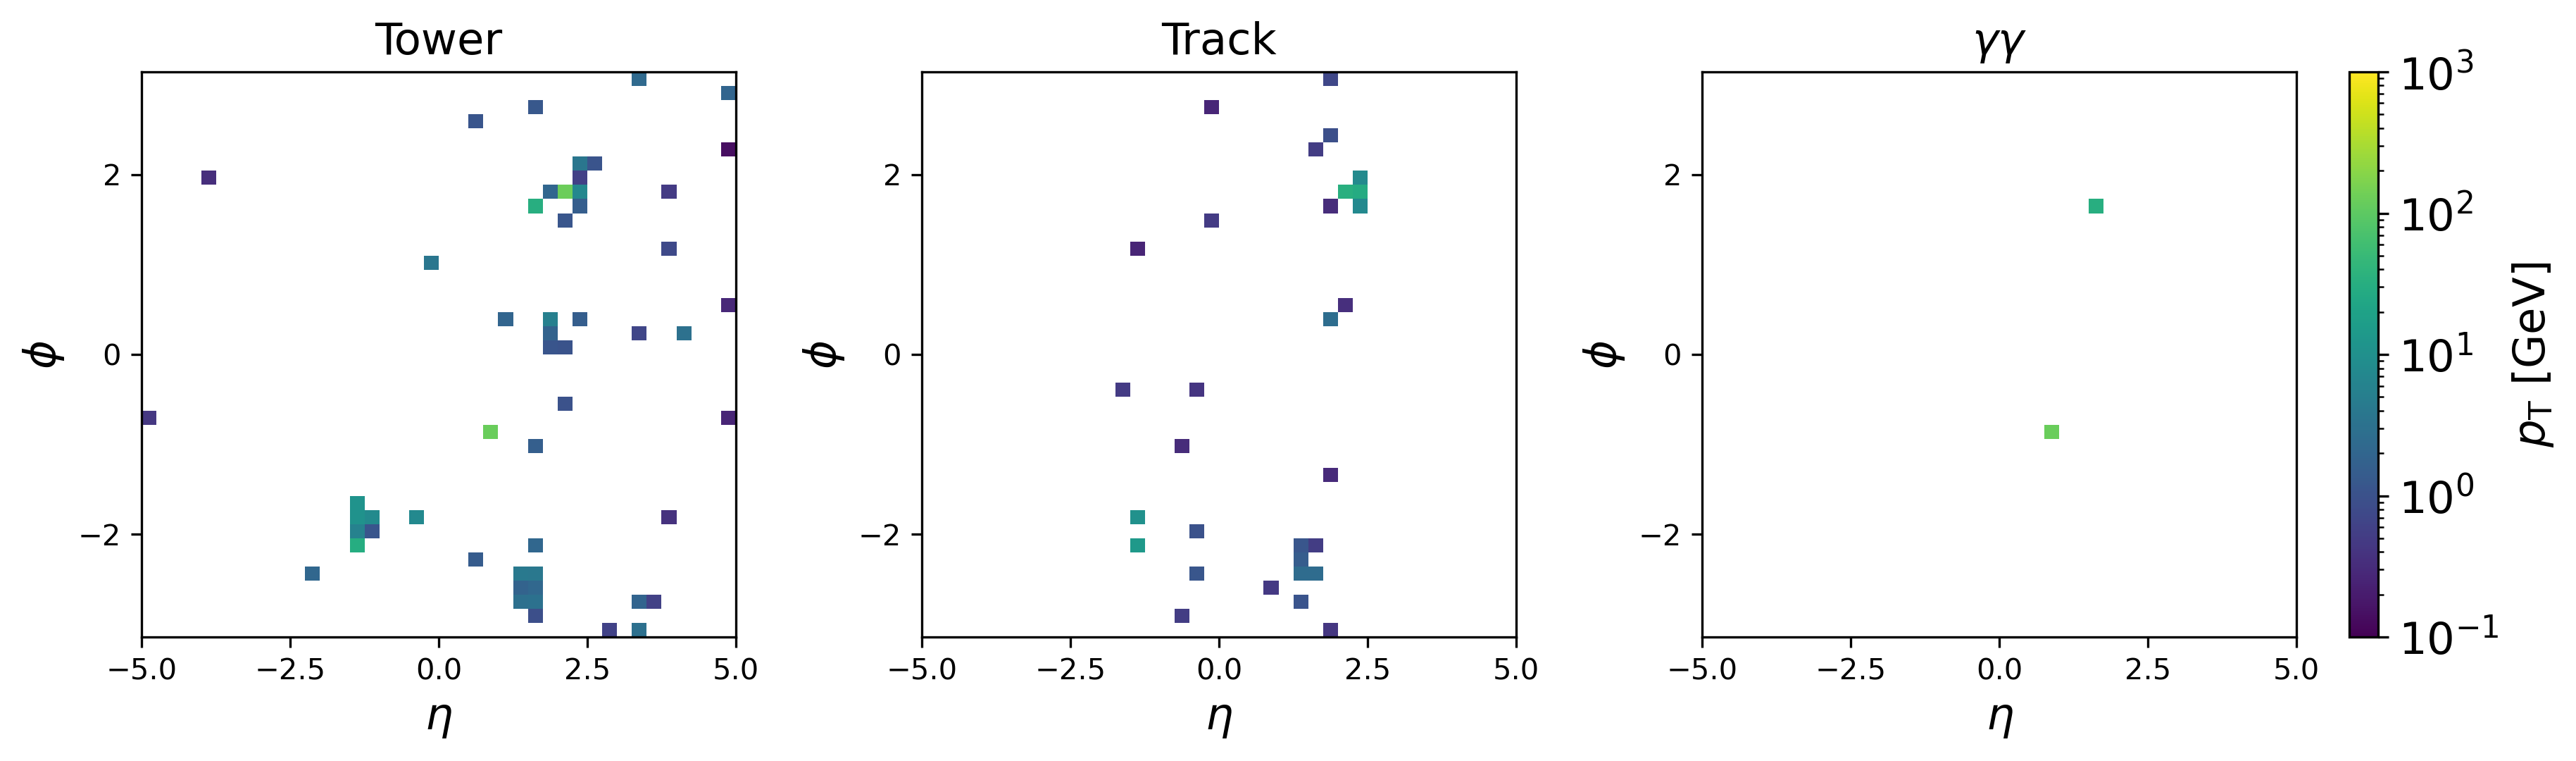

In [5]:
plot_event_images(VBF_diphoton_data, process='VBF_diphoton', titles=['Tower', 'Track', r"$\gamma\gamma$"])

Minimum and maximum pT in images: 0.0, 1606.86865234375


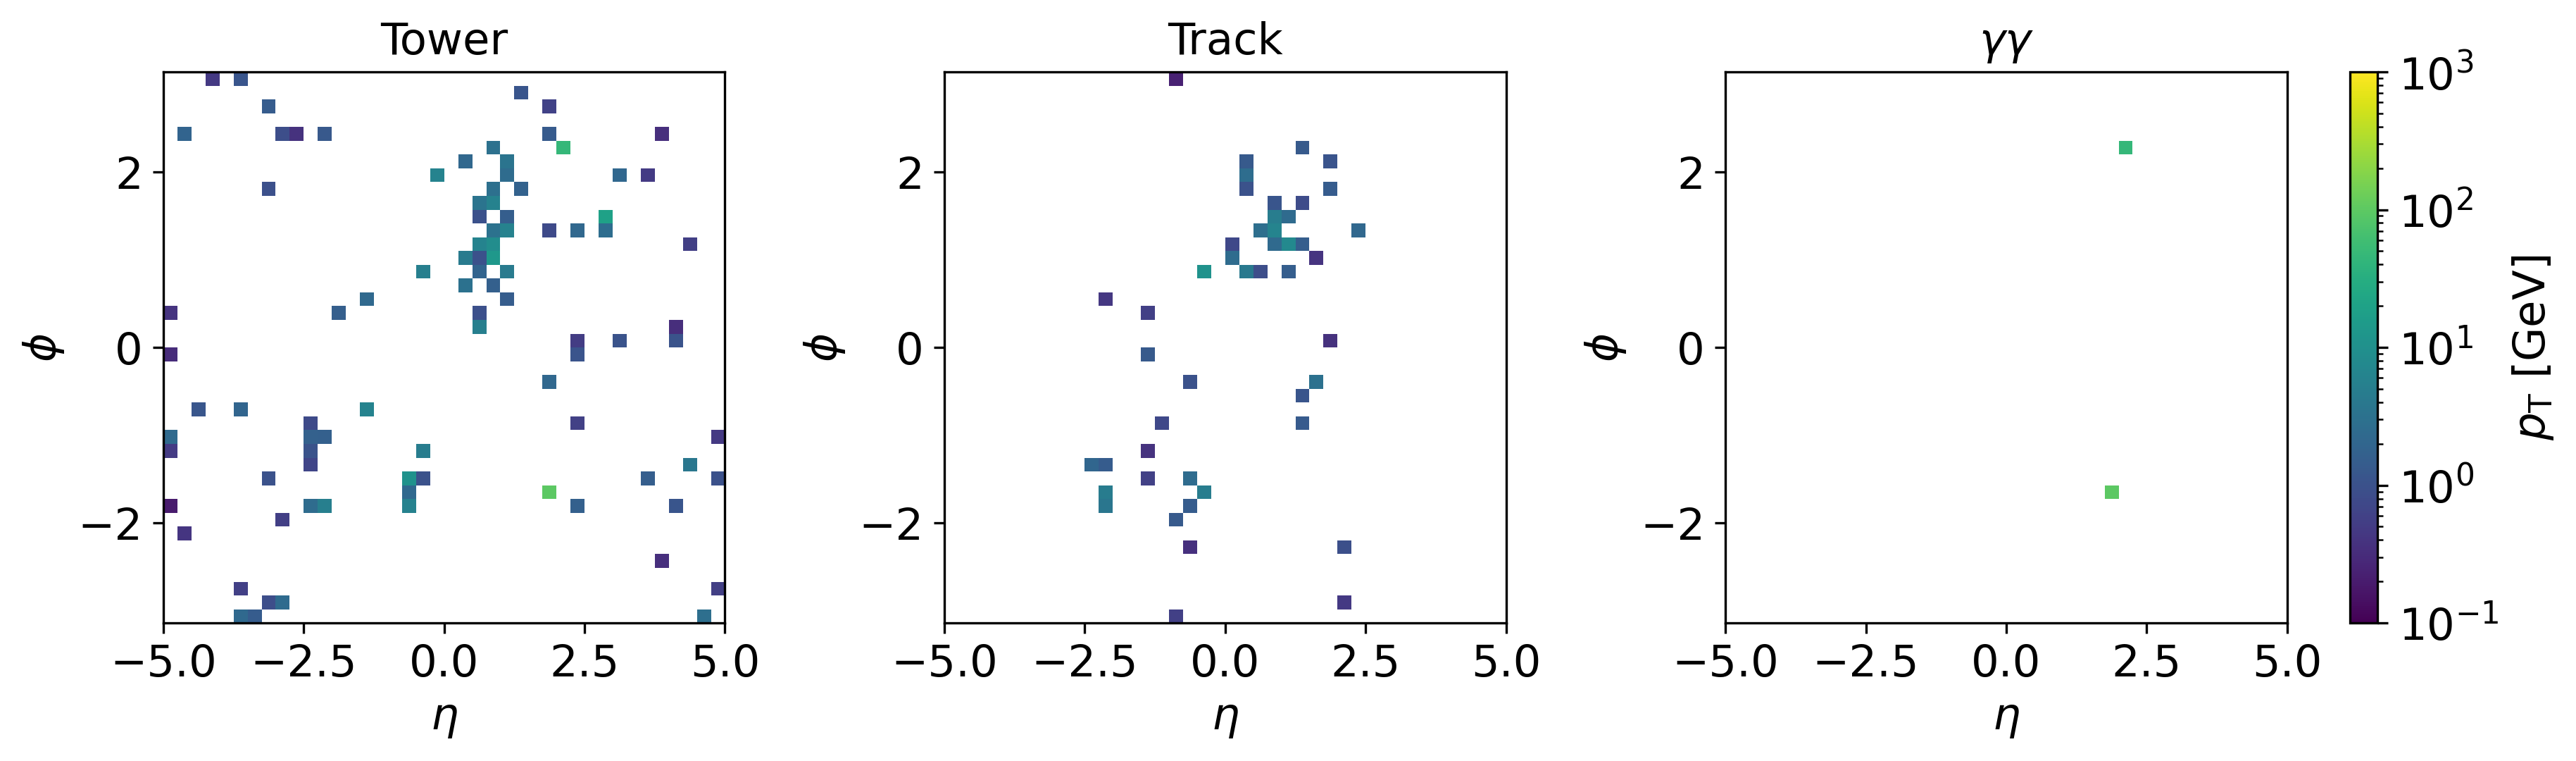

In [6]:
plot_event_images(GGF_diphoton_data, process='GGF_diphoton', titles=['Tower', 'Track', r"$\gamma\gamma$"])

Minimum and maximum pT in images: 0.0, 2479.242431640625


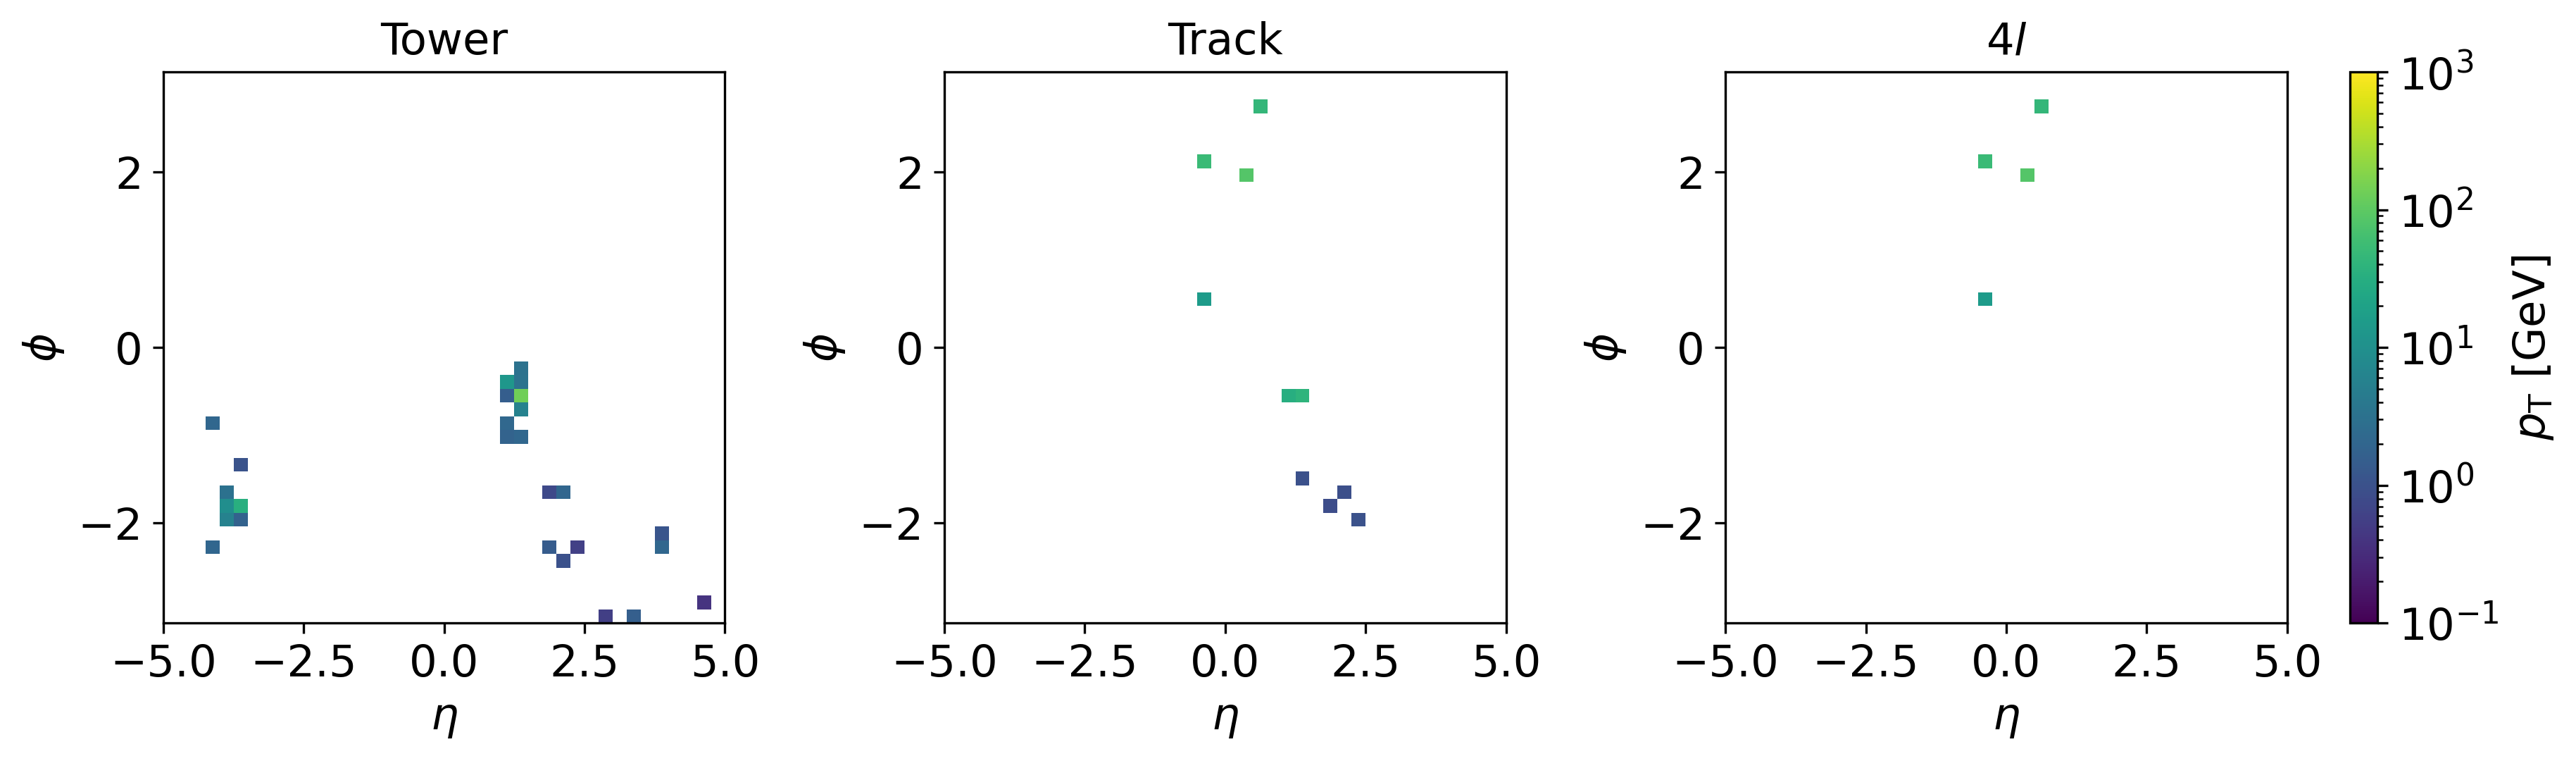

In [7]:
plot_event_images(VBF_zz4l_data, process='VBF_zz4l', titles=['Tower', 'Track', r"$4l$"])

Minimum and maximum pT in images: 0.0, 4201.048828125


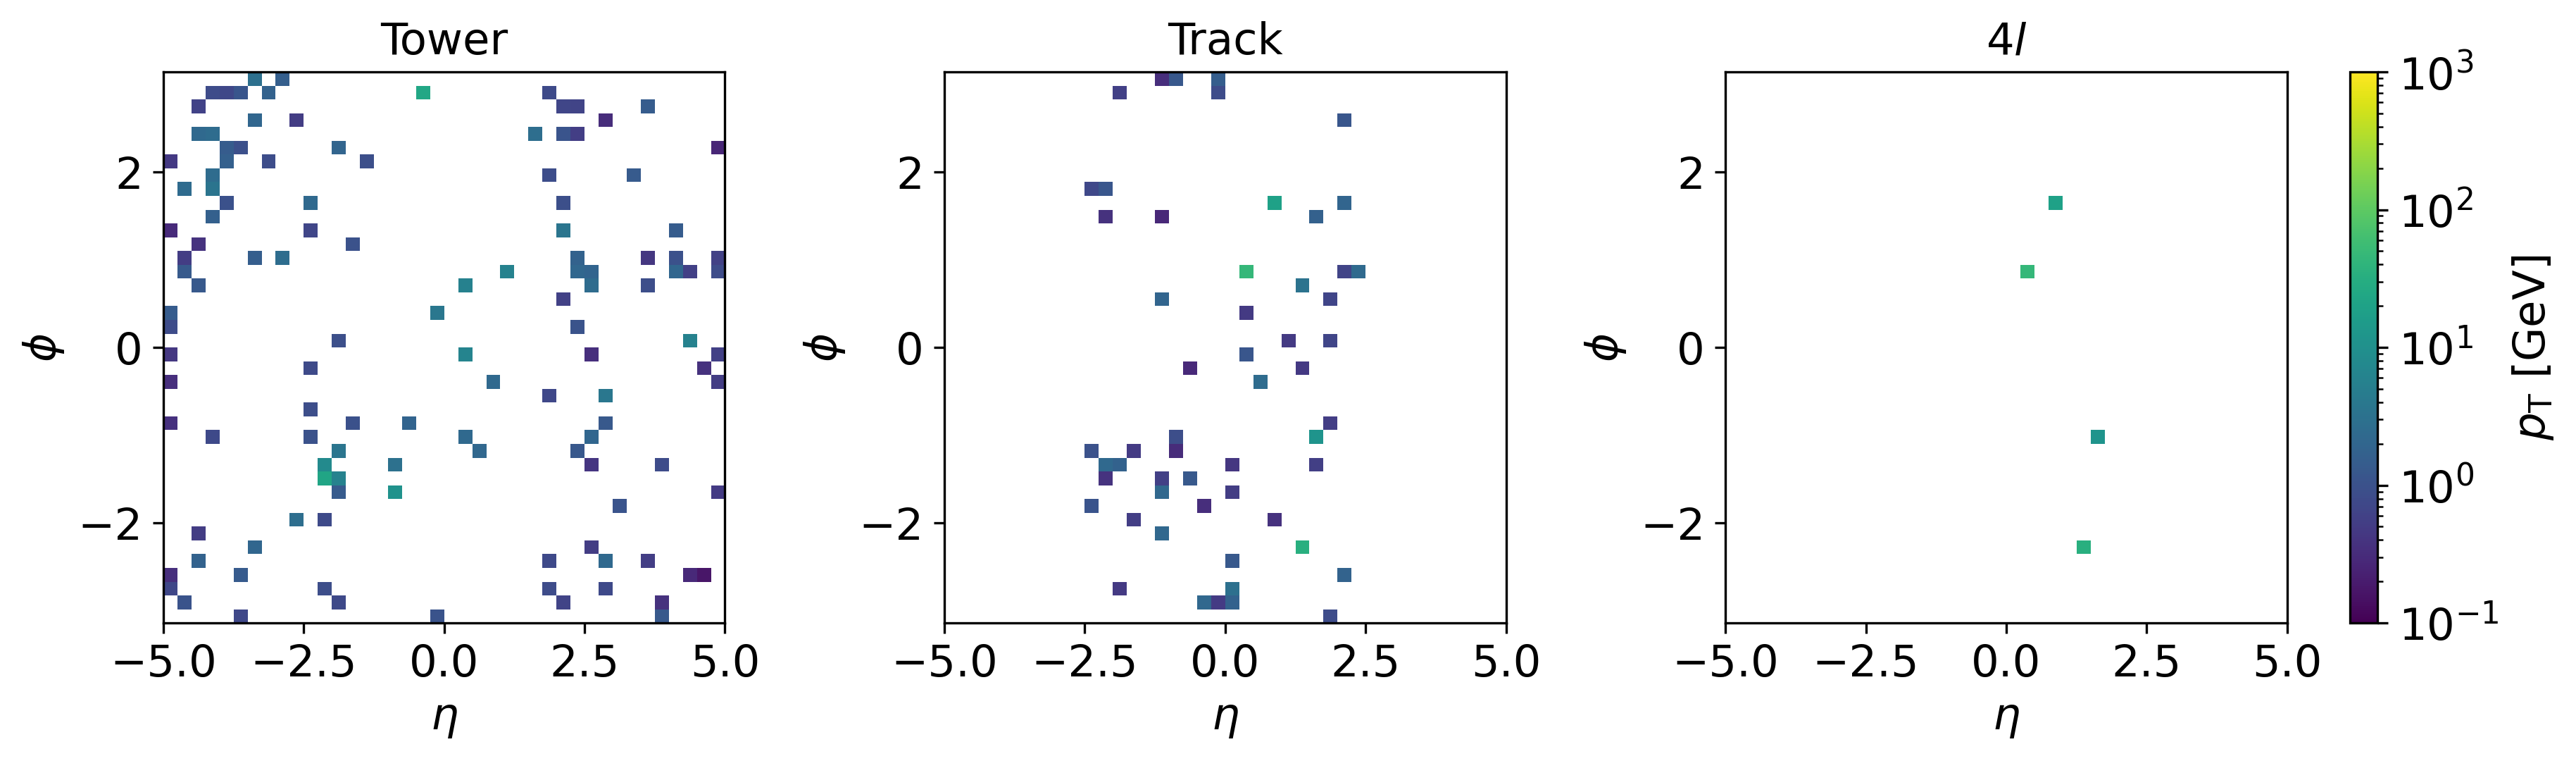

In [8]:
plot_event_images(GGF_zz4l_data, process='GGF_zz4l', titles=['Tower', 'Track', r"$4l$"])

Minimum and maximum pT in images: 0.0, 1369.5013427734375


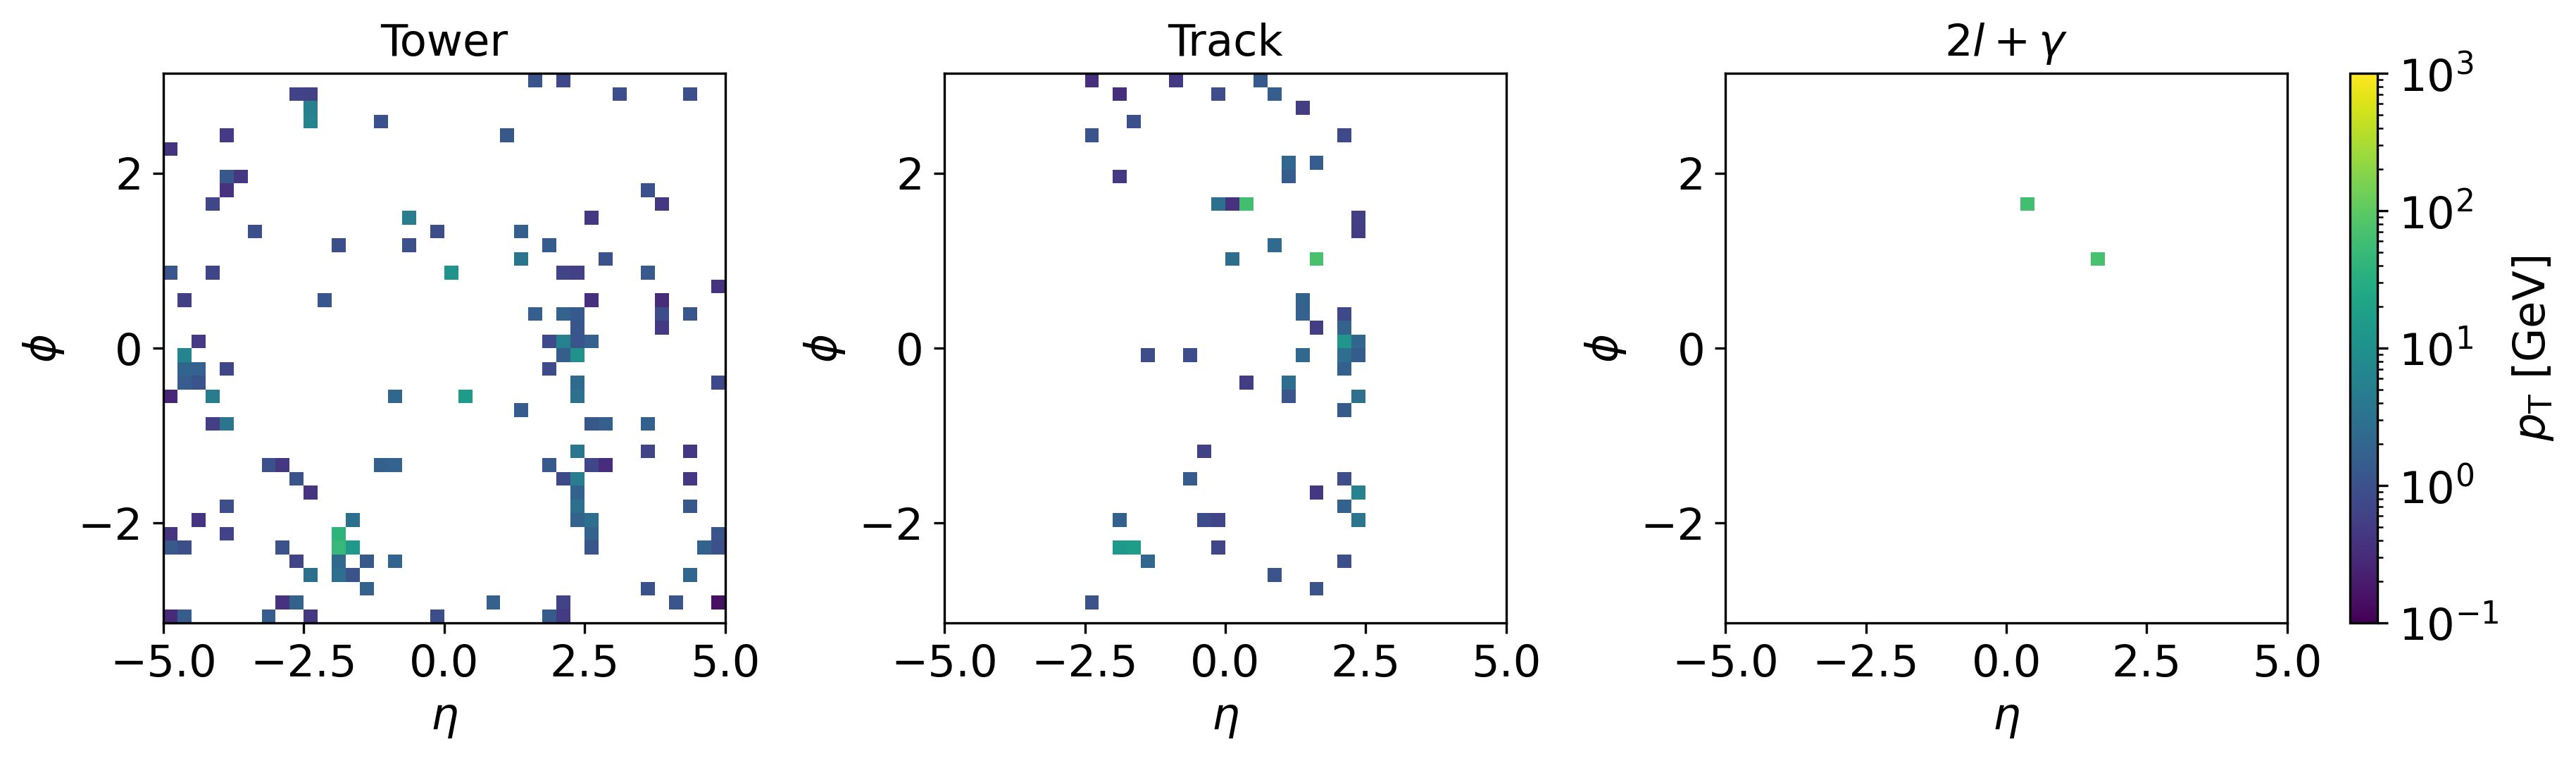

In [9]:
plot_event_images(VBF_za2l_data, process='VBF_za2l', titles=['Tower', 'Track', r"$2l + \gamma$"])

Minimum and maximum pT in images: 0.0, 1243.9046630859375


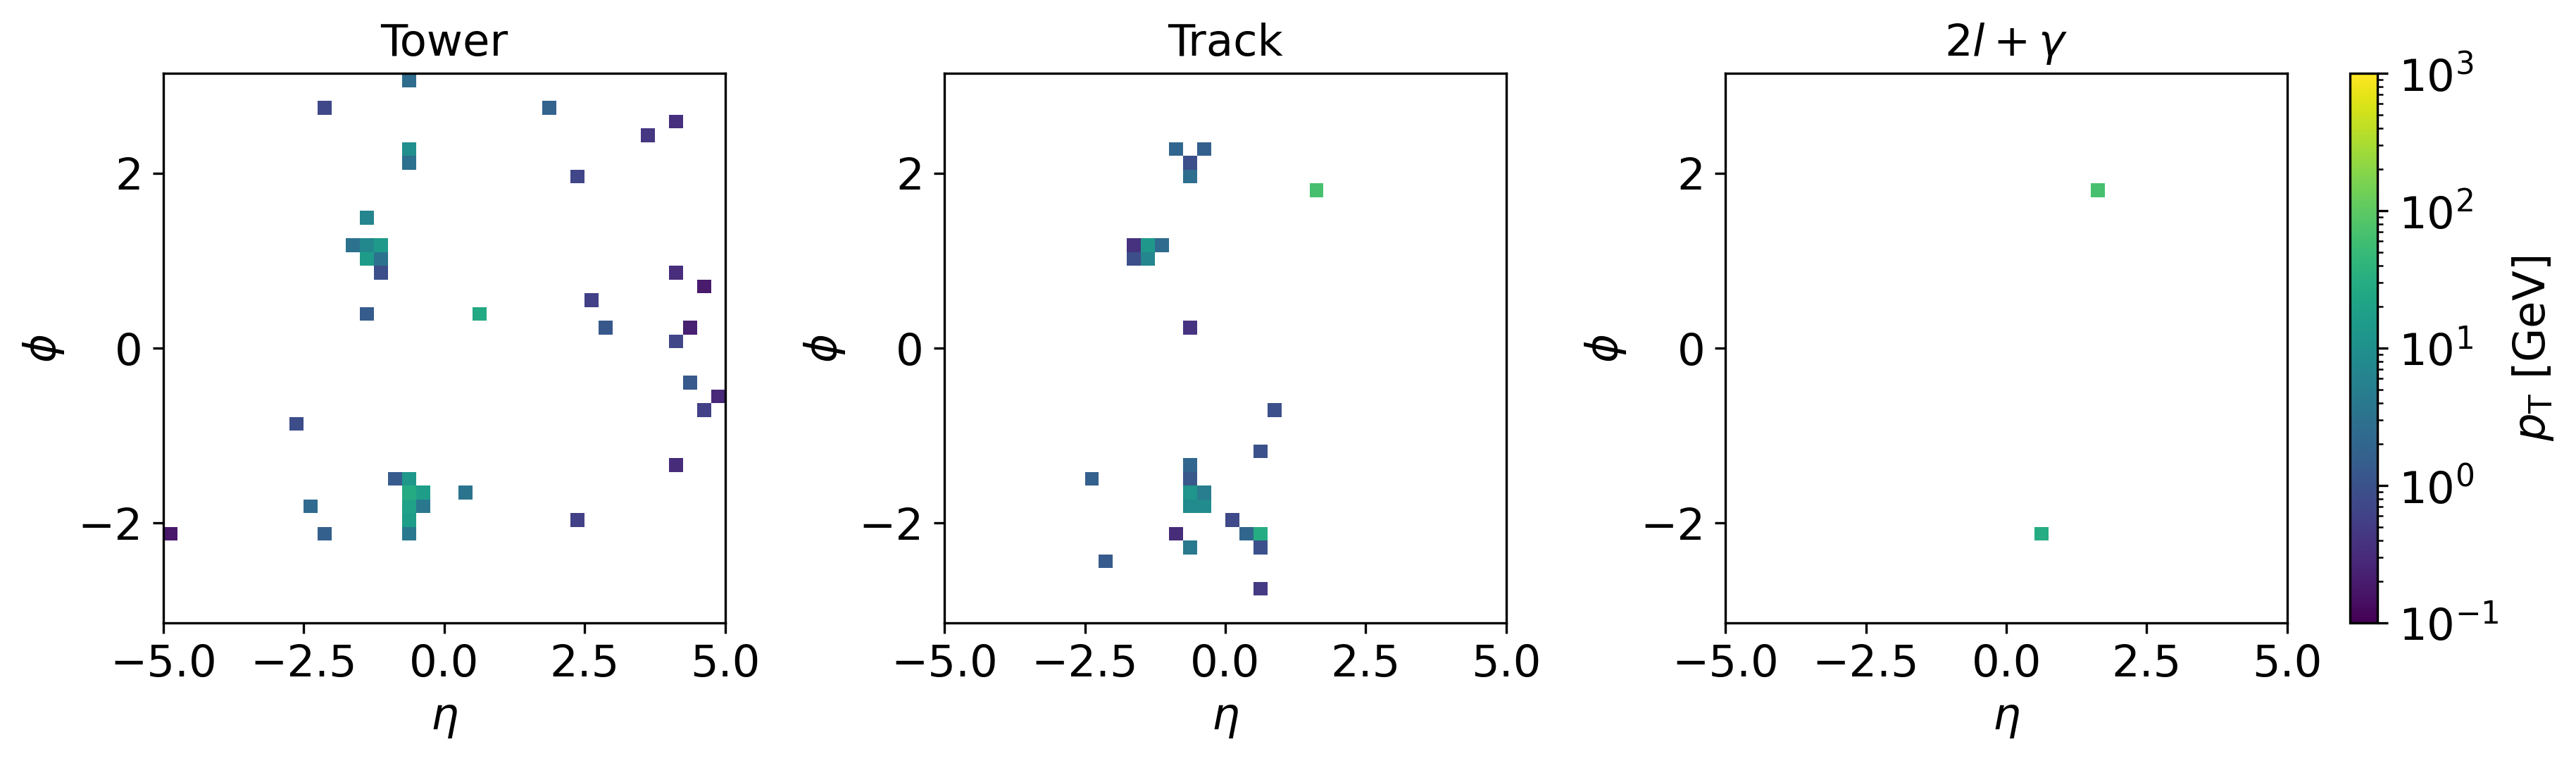

In [10]:
plot_event_images(GGF_za2l_data, process='GGF_za2l', titles=['Tower', 'Track', r"$2l + \gamma$"])